# Lab 8 : Star Formation 

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
# Function to calculate the star formation rate at a given luminosity.

def SFR(L, type, TIR = 0):
    '''Function that calculates the star formation rate (SFR) from Kennicutt and Evans 2012
    Inputs: L = Luminosity of the galaxy.
    type = band of the luminosity (FUV, TIR, H-alpha) in ergs/s
    TIR = correction in TIR (default set to 0)
    Returns: the star formation rate in M_sun/yr'''
    if (type == 'FUV'):
        logC = 43.35 #calibration from L to SFR. Taken from table 1 from Kennicutt & Evans 2012.
        TIRc = 0.46 # correction for dust absorption from table 2.
    elif(type == 'NUV'):
        logC = 43.17
        TIRc = 0.27
    elif(type == 'Halpha'):
        logC = 41.27
        TIRc = 0.0024
    elif(type == 'TIR'):
        logC = 43.41
        TIRc = 0
    else:
        print('Missing wavelength(FUV,NUV,Halpha,TIR)')
    
    # Correct the luminosity for dust:
    Lnew = L + TIRc*TIR
    
    return np.log10(Lnew) - logC
        

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [4]:
LSun_ergs = const.L_sun.to(u.erg/u.s).value

In [5]:
#  WLM Dwarf Irregular Galaxy
# from Lee et al. 2009, WLM galaxy log(SFR) derived from UV is -2.21 --> Galex
# from NED WLM NUV luminosity is 1.71e7 L_sun.
# from NED WLM near-IR (IRAC) luminosity = 2.48e6 L_sun
NUV_WLM = 1.71e7*LSun_ergs
TIR_WLM = 2.48e6*LSun_ergs
SFR(NUV_WLM,'NUV', TIR_WLM)


-2.3373504191027266

In [6]:
#  N24 Sc galaxy
# From Lee et al. 2009, log(SFR) in the UV is -0.7
# from NED NGC 24 NUV luminosity (GALEX) is 2.96e8 L_sun
# from NED NGC 24 far-IR luminosity (MIPS) is 3.09e8 L_sun
# from NED NGC 24 near-IR luminosity (2MASS) is 8.34e8 L_sun
NUV_N24 = 2.96e8*LSun_ergs
TIR_N24 = 3.09e8*LSun_ergs
SFR(NUV_N24,'NUV',TIR_N24)

-1.0078964050716621

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [7]:
# Function that returns that average SFR in a galaxy at a given redshift.

def SFR_MainSequence(M_star, z):
    '''Average SFR as a function of stellar mass and redshift
    Inputs: z = redshift and M_star = stellar mass of galaxy in M_sun
    Returns: Log(SFR) in M_sun/year'''
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    return alpha*(np.log10(M_star) - 10.5) + beta


In [8]:
# MW at z=0
10**SFR_MainSequence(6e10, 0)
# actual SFR of MW is only 1 M_sun/year.

3.7558295562247412

In [9]:
# MW at z = 1
10**SFR_MainSequence(6e10, 1)

30.799680595160783

In [10]:
# create an array of stellar masses
Mass = np.linspace(1e9,1e12)

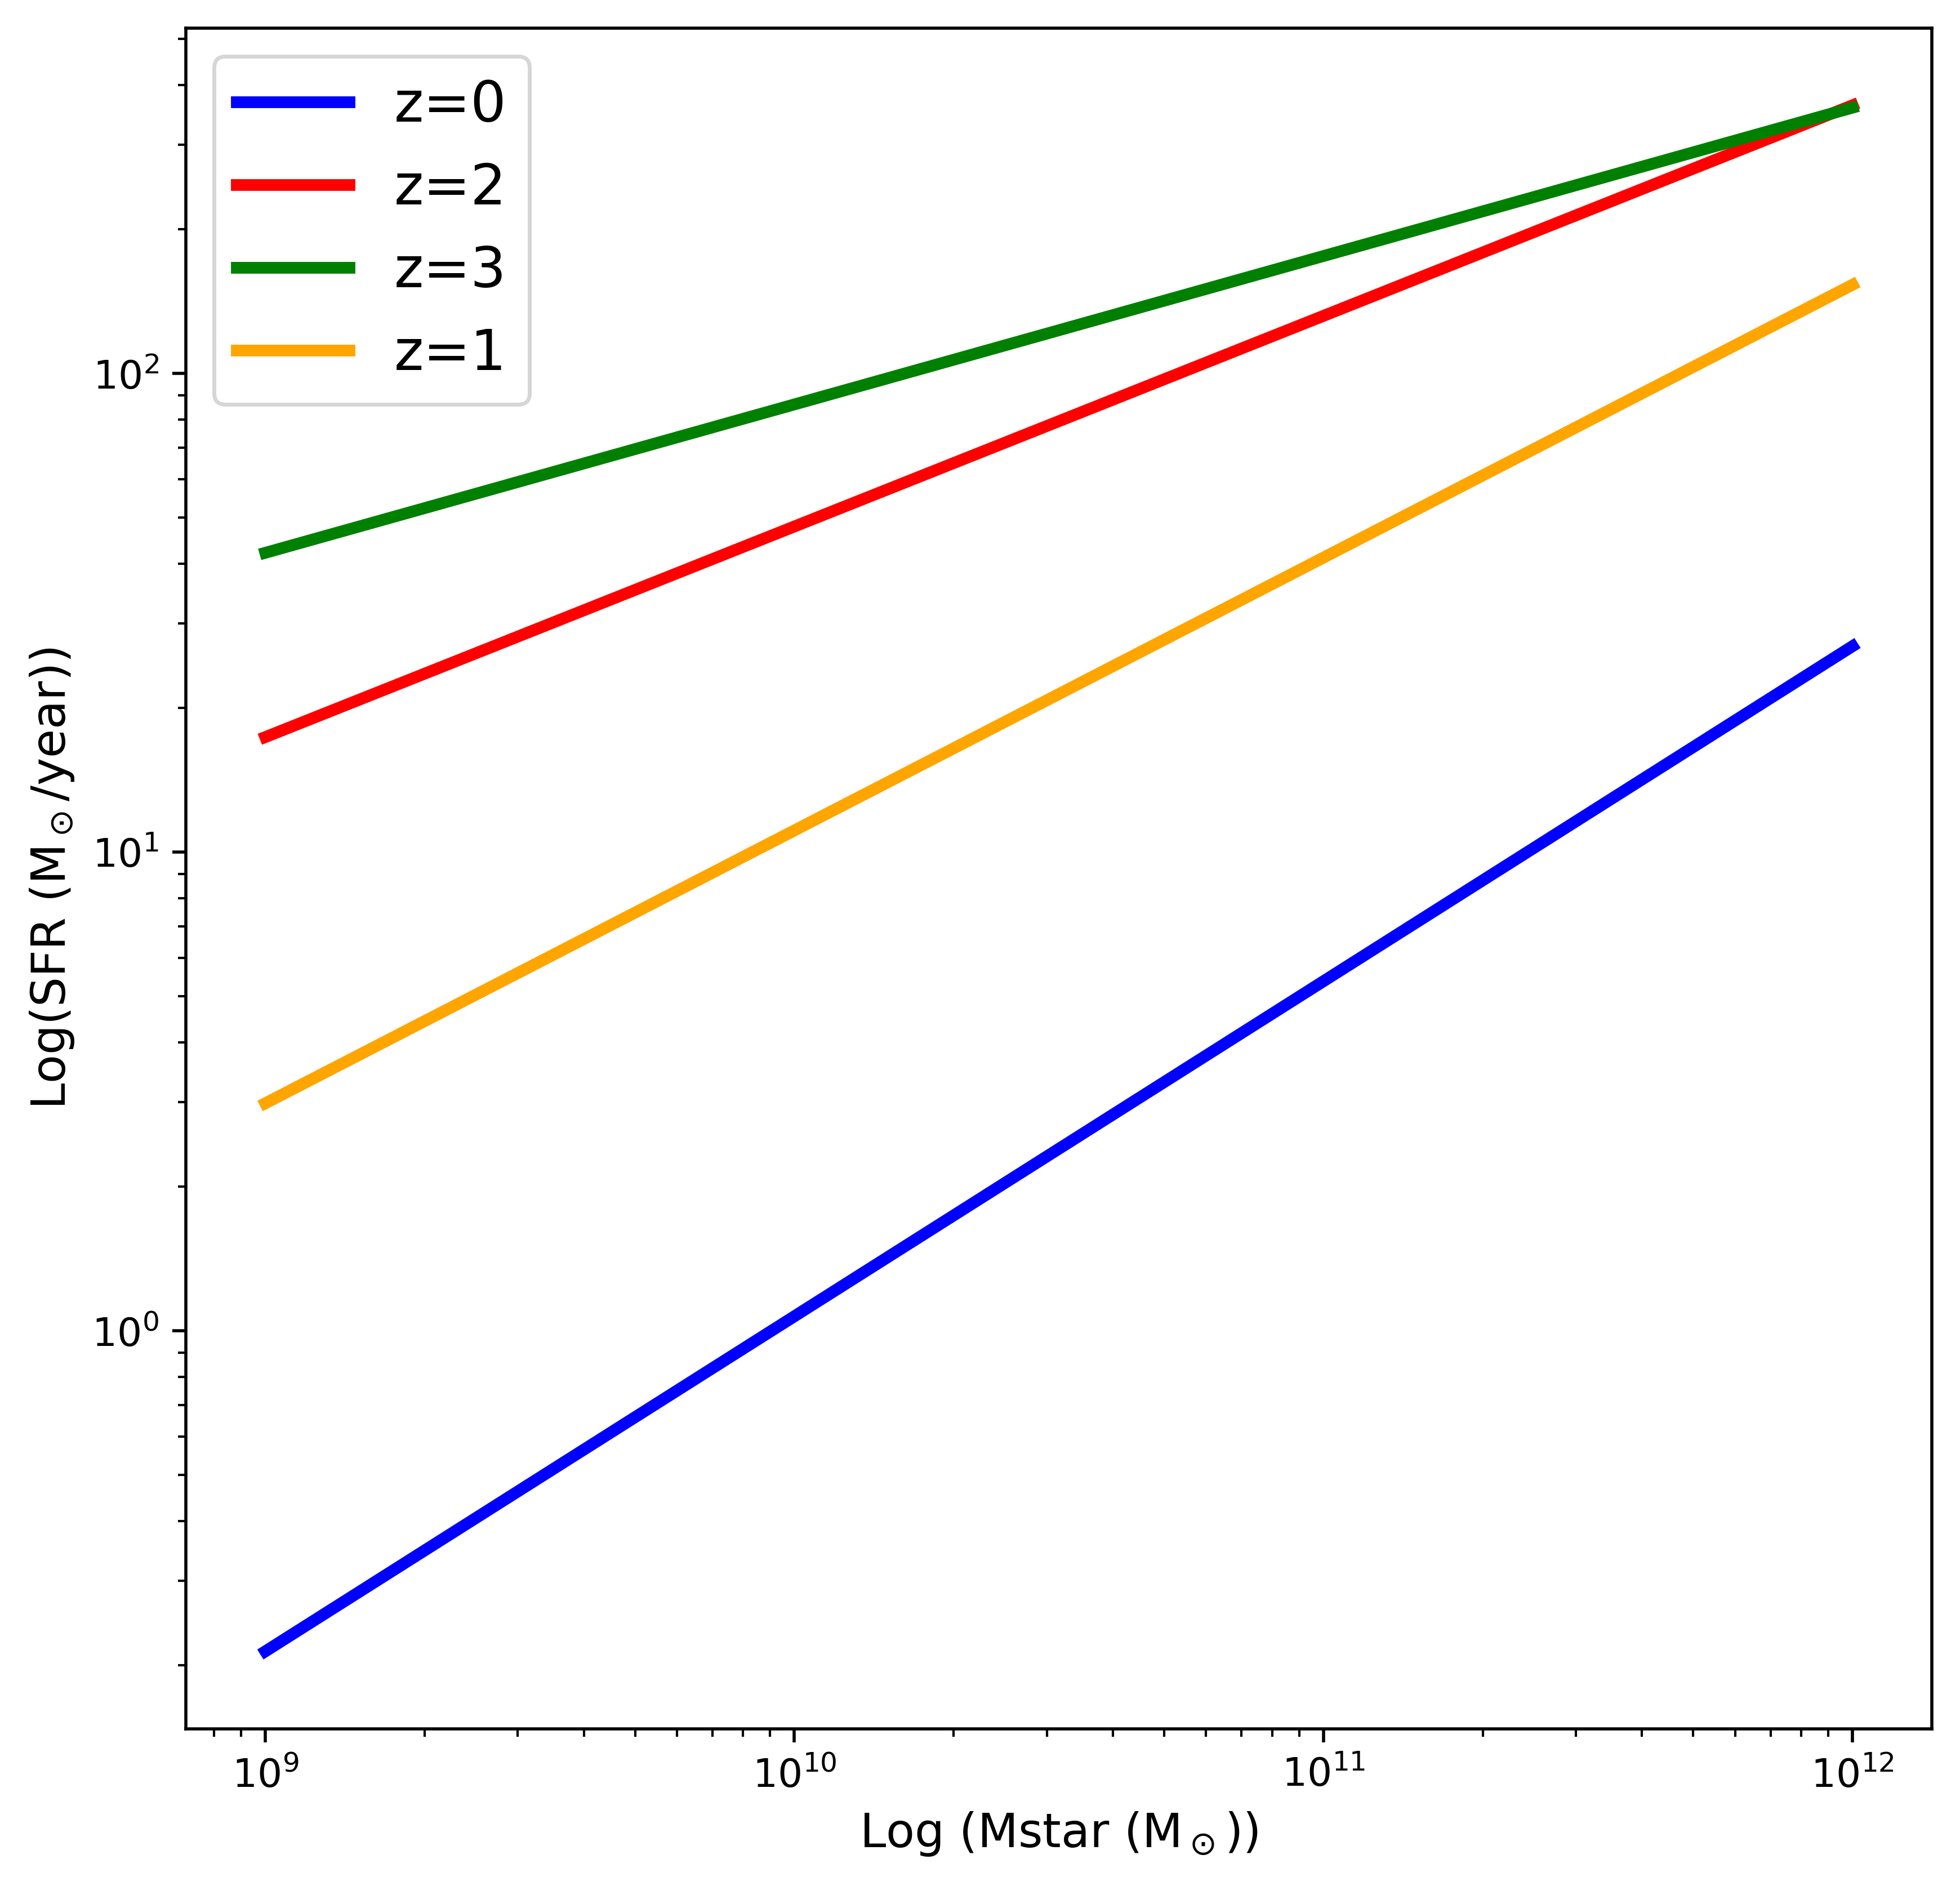

In [11]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFR_MainSequence(Mass,0), color = 'blue', linewidth = 3, label = 'z=0')
plt.loglog(Mass, 10**SFR_MainSequence(Mass,2), color = 'red', linewidth = 3, label = 'z=2')
plt.loglog(Mass, 10**SFR_MainSequence(Mass,3), color = 'green', linewidth = 3, label = 'z=3')
plt.loglog(Mass, 10**SFR_MainSequence(Mass,1), color = 'orange', linewidth = 3, label = 'z=1')




# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [16]:
# normal galaxies L = 10^10 L_sun
TIR_Norm = 1e10*LSun_ergs
10**SFR(TIR_Norm,'TIR')


1.4892648150381245

In [17]:
# LIRGs: L = 1e11 L_sun 
TIR_LIRG = 1e11*LSun_ergs
10**SFR(TIR_LIRG, 'TIR')

14.892648150381245

In [18]:
# ULIRGs
TIR_ULIRG = 1e12*LSun_ergs
10**SFR(TIR_ULIRG,'TIR')

148.92648150381245

In [19]:
# HLIRGs
TIR_HLIRG = 1e13*LSun_ergs
10**SFR(TIR_HLIRG,'TIR')

1489.2648150381244